<a href="https://colab.research.google.com/github/valsson-group/UNT-Chem5660-Fall2023/blob/main/Python-PlotData/Plot_IR_Spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manipulation of Data and Plotting It Using Using Python

In this notebook we show how we can use either Numpy or awk to manipulate data and then use Matplotlib to plot the data.

This is an extension of previous [Jupyter notebook](https://colab.research.google.com/github/valsson-group/UNT-Chem5660-Fall2023/blob/main/Python-PlotData/PlotDihedralData.ipynb) where we showed how we can use matplotlib to plot the dihedral scan data. Thus, you should be familar all the aspects from that notebook, for example, how you can upload data files to the Colab runtime, and how to load data with `np.loadtxt(..)` command.



We first import the numpy and matplotlib packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

## Loading the Datasets

The first step is to load the datasets we want.

Here we will work with example data of the IR spectrum, either experimental results or predicted from the calculations.

Youw will need to change this part, and also add other `np.loadtxt(..)` commands if you want to load multiple files.



In [2]:
# This is only needed to download example data
%%capture
!wget https://raw.githubusercontent.com/valsson-group/UNT-Chem5660-Fall2023/main/Python-PlotData/azobenzene_ir-spectra_gas-phase.dat
!wget https://raw.githubusercontent.com/valsson-group/UNT-Chem5660-Fall2023/main/Python-PlotData/azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat


In [15]:
# This is just an example
ir_exp = np.loadtxt("azobenzene_ir-spectra_gas-phase.dat")
ir_blyp = np.loadtxt("azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.dat")

print("Shape of ir_exp: {:}".format(ir_exp.shape))
print("Shape of ir_blyp: {:}".format(ir_blyp.shape))


# For your own data, you need to write a seperate np.loadtxt call for each data file,
# something like
# data_blyp = np.loadtxt("<name-of-datafile>")
# where you replace <name-of-datafile> with the filename.





Shape of ir_exp: (825, 2)
Shape of ir_blyp: (10000, 2)


## Initial Plotting of Data

We will first plot the two data files separately to show that they are printed in two very different formats and that we need to manipulate the data to be able to plot them on the same plot.

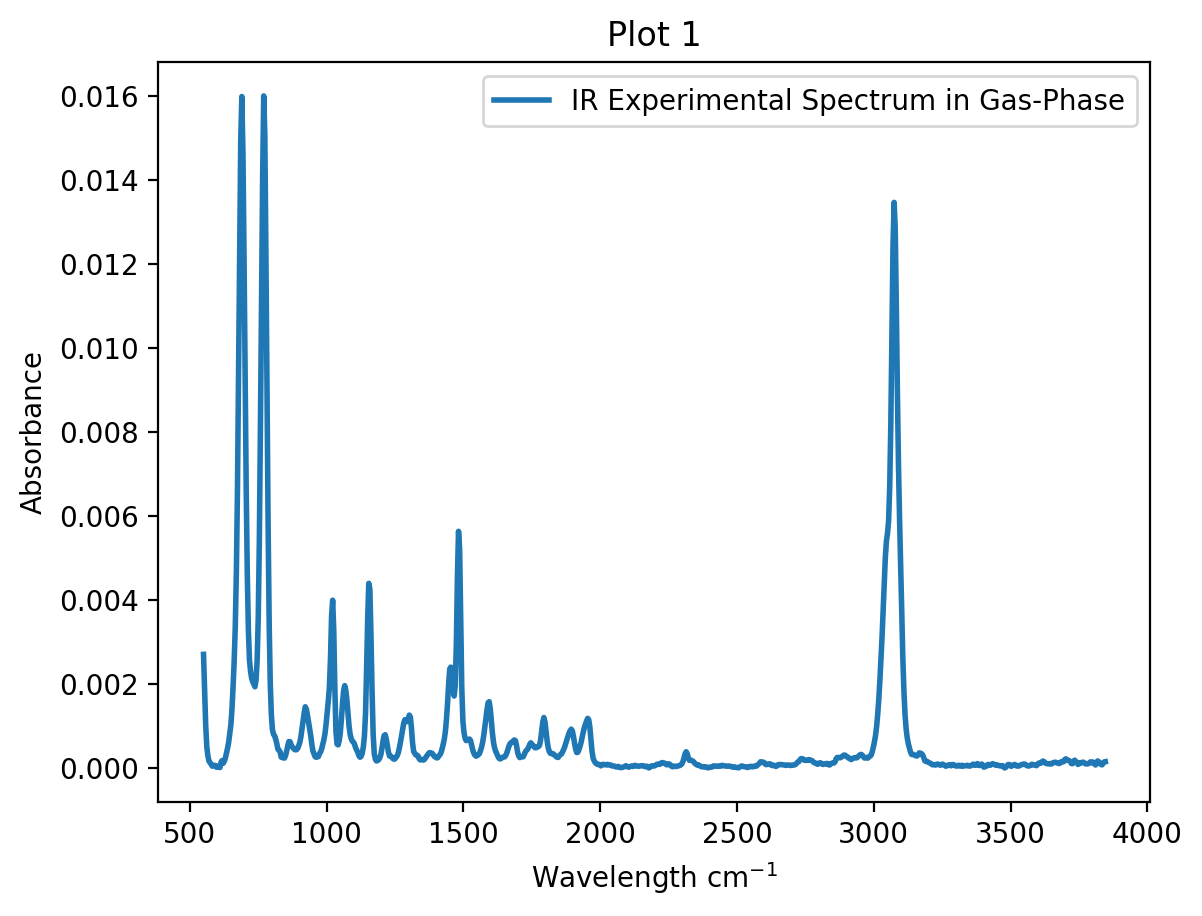

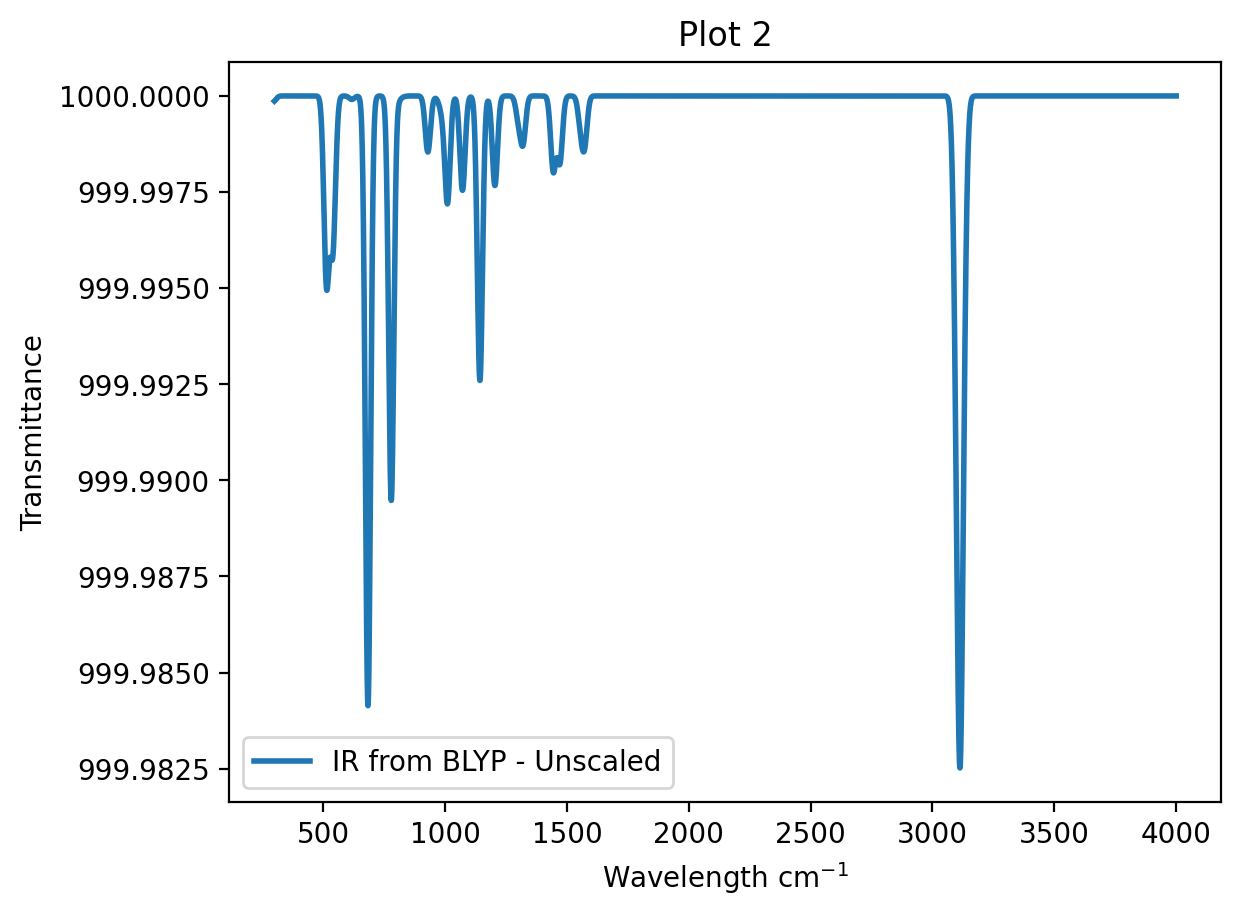

In [10]:
# Plot 1
plt.plot(ir_exp[:,0],
         ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.legend()
# This the range of y-axis, might need to be adjusted
plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Plot 1")
# adding this command will show the current plot
plt.show()

# Plot 2
plt.plot(ir_blyp[:,0],
         ir_blyp[:,1],
         "-",
         linewidth=2,
         label="IR from BLYP - Unscaled")
plt.legend()
# plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Transmittance")
plt.title("Plot 2")
# This is trick to fix the formatting of y-ticks, only needed for the Transmittance plots
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
# adding this command will show the current plot
plt.show()





As we can see, the experimental data is given in terms of absorbance $A$, while the IR spectrum from ORCA is given in terms of the transmittance $T$. Thus, we need to manipulate the data.

Looking at the two plot, we can observe that here the relation between the two in this case appears to be

\begin{align}
T = 1000-A
\end{align}
or
\begin{align}
A = 1000-T
\end{align}




## Way 1: Changing from Transmittance to Absorbance

We first show how we can change the IR spectrum from ORCA from transmittance format to absorbance format. For this we can just do a simple mathematical operation on the vector according to the equation above for the y-axis and save that in a new vector. The mathemetical operation is done elementwise on the all the elements in the vector.




In [23]:
# ir_blyp[:,1] is the y-axis from IR spectrum from ORCA
# [:,1] means that we take all the rows in the 2nd column in the ir_blyp matrix obtained from
# the data file. Note: Python indexing starts from 0.

# ir_blyp_abs is a new vector
ir_blyp_abs = 1000.0 - ir_blyp[:,1]

# We can see that both vectors have the same size
print("Size of ir_blyp[:,1]: {:d}".format(len(ir_blyp[:,1])))
print("Size of ir_blyp_abs: {:d}".format(len(ir_blyp_abs)))
print("")
print("ir_blyp[:,1]:")
print("- Minimum {:f}".format(np.min(ir_blyp[:,1])))
print("- Maximum {:f}".format(np.max(ir_blyp[:,1])))
print("ir_blyp_abs")
print("- Minimum {:f}".format(np.min(ir_blyp_abs)))
print("- Maximum {:f}".format(np.max(ir_blyp_abs)))



Size of ir_blyp[:,1]: 10000
Size of ir_blyp_abs: 10000

ir_blyp[:,1]:
- Minimum 999.982519
- Maximum 1000.000000
ir_blyp_abs
- Minimum 0.000000
- Maximum 0.017481


Now we can plot the absorbance of both on the same plot

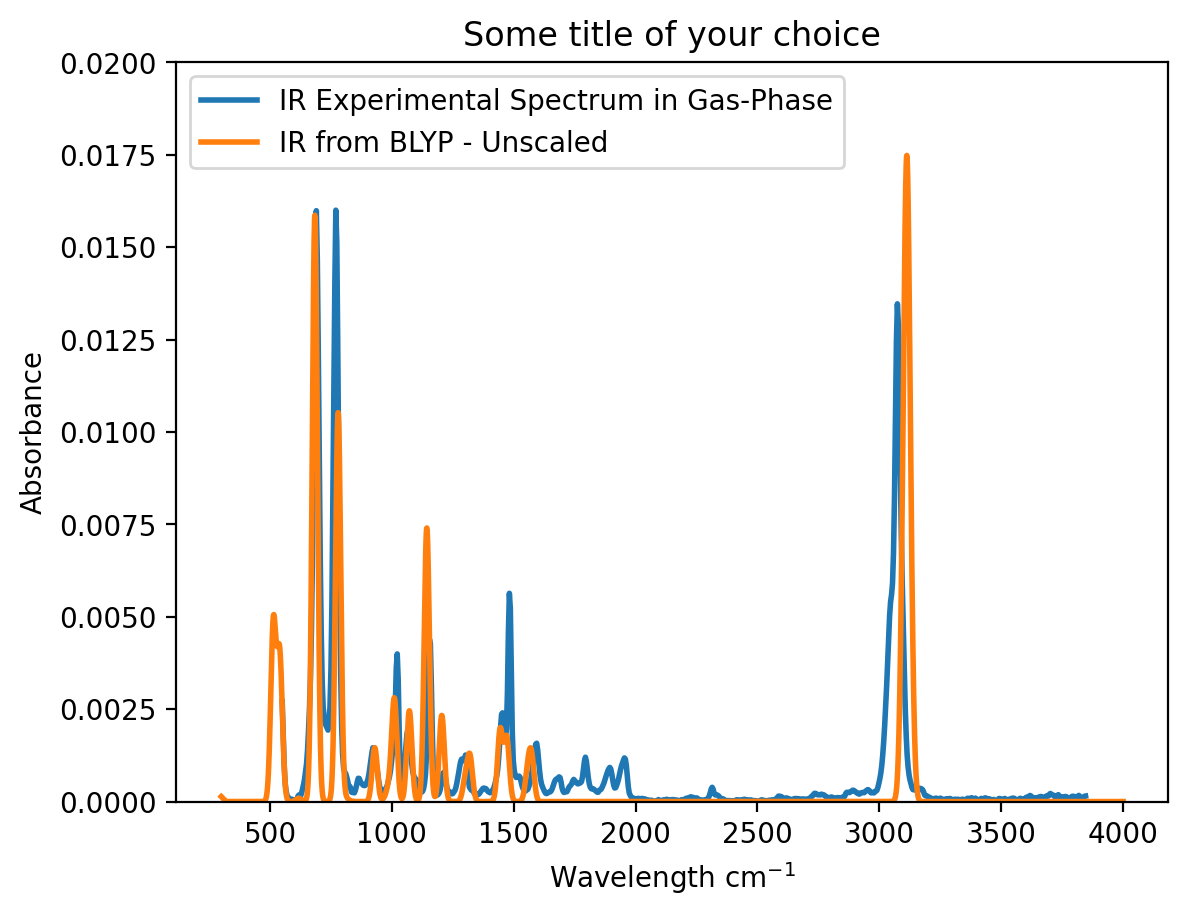

In [26]:
plt.plot(ir_exp[:,0],
         ir_exp[:,1],
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.plot(ir_blyp[:,0],
         ir_blyp_abs,
         "-",
         linewidth=2,
         label="IR from BLYP - Unscaled")
# This the range of y-axis, might need to be adjusted
plt.ylim([0.0,0.020])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Absorbance")
plt.title("Some title of your choice")
plt.legend()
# You can add a plt.savefig(..) call to save the plot to a PNG file.
plt.savefig("Plot_Absorbance.png")
# adding this command will show the current plot
plt.show()



## Way 2: Changing from Absorbance to Transmittance

We now show how we can change the experimental IR spectrum from absorbance format to transmittance format.

In [27]:
# ir_exp[:,1] is the y-axis from the experimental IR spectrum

# ir_blyp_abs is a new vector
ir_exp_trans = 1000.0 - ir_exp[:,1]

# We can see that both vectors have the same size
print("Size of ir_exp[:,1]: {:d}".format(len(ir_exp[:,1])))
print("Size of ir_exp_trans: {:d}".format(len(ir_exp_trans)))
print("")
print("ir_exp[:,1]:")
print("- Minimum {:f}".format(np.min(ir_exp[:,1])))
print("- Maximum {:f}".format(np.max(ir_exp[:,1])))
print("ir_exp_trans")
print("- Minimum {:f}".format(np.min(ir_exp_trans)))
print("- Maximum {:f}".format(np.max(ir_exp_trans)))

Size of ir_exp[:,1]: 825
Size of ir_exp_trans: 825

ir_exp[:,1]:
- Minimum 0.000000
- Maximum 0.016000
ir_exp_trans
- Minimum 999.984000
- Maximum 1000.000000


Now we can plot the transmittance of both on the same plot

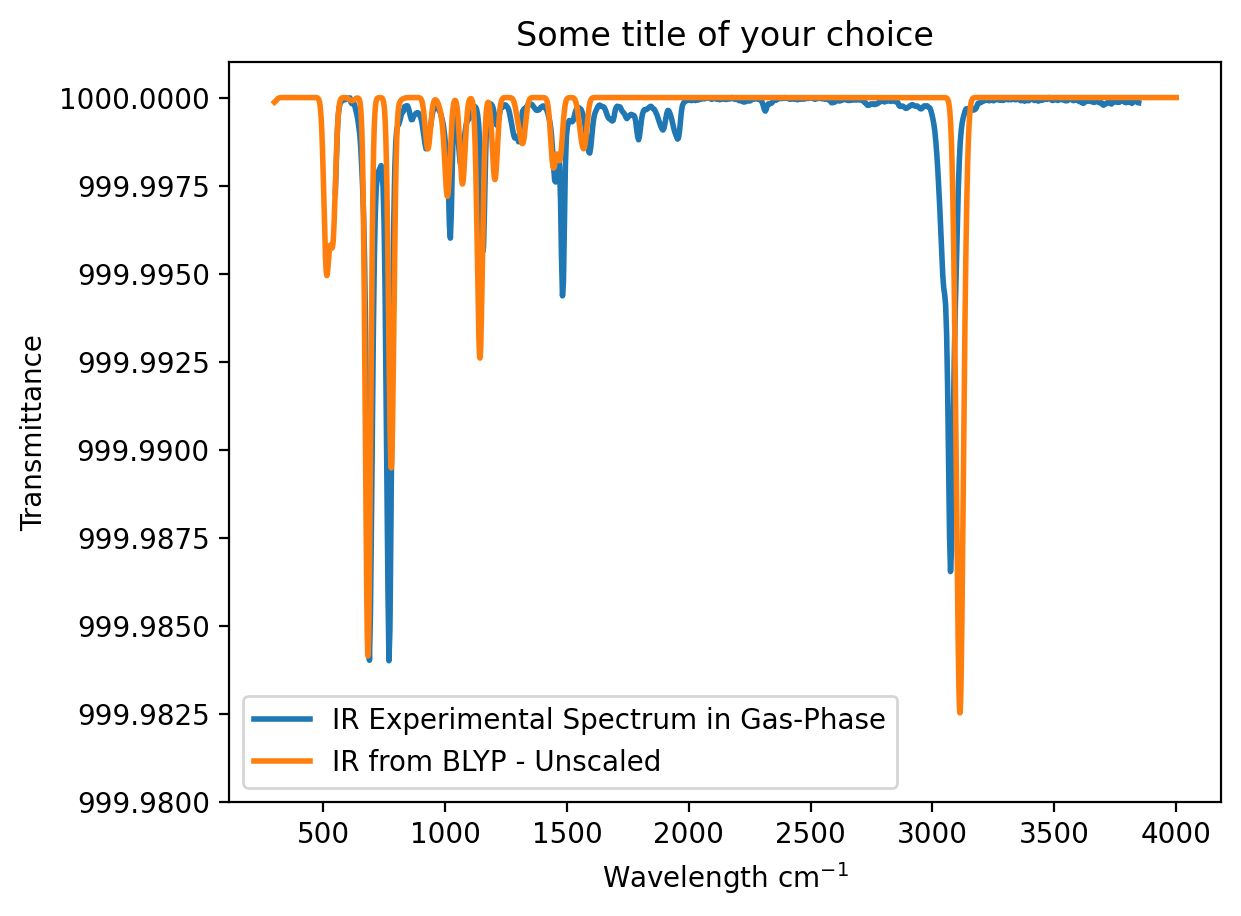

In [32]:
plt.plot(ir_exp[:,0],
         ir_exp_trans,
         "-",
         linewidth=2,
         label="IR Experimental Spectrum in Gas-Phase")
plt.plot(ir_blyp[:,0],
         ir_blyp[:,1],
         "-",
         linewidth=2,
         label="IR from BLYP - Unscaled")
# This the range of y-axis, might need to be adjusted
plt.ylim([999.98,1000.001])
# You can use LaTeX math syntax in label text by enclosing it in $$
plt.xlabel("Wavelength cm$^{-1}$")
plt.ylabel("Transmittance")
plt.title("Some title of your choice")
plt.legend()
# This is trick to fix the formatting of y-ticks, only needed for the Transmittance plots
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
# adding this command will show the current plot

# You can add a plt.savefig(..) call to save the plot to a PNG file.
plt.savefig("Plot_Transmittance.png")

plt.show()

## Saving the Data to File

We can save the manipulated data to text files by using the `np.savetxt(..)` command from numpy (see https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html)

**Note: you will need to download the sa**

In [46]:
# Experimental IR spectrum in transmittance format
# Some hacks to get the data into the right way to combine it
ir_exp_cm1 = ir_exp[:,0]
ir_exp_cm1.shape=(-1,1)
# saving to a file with the given filename
Filename="azobenzene_ir-spectra_gas-phase.transmittance.dat"
np.savetxt(Filename,
           X=np.concatenate((ir_exp_cm1,ir_exp_trans),axis=1)
          )

# ORCA IR spectrum in absorbance format
# Some hacks to get the data into the right way to combine it
ir_blyp_cm1 = ir_exp[:,0]
ir_blyp_cm1.shape=(-1,1)
# saving to a file with the given filename
Filename="azobenzene_trans_BLYP_def2-TZVPP_ORCA.out.ir.absorbance.dat"
np.savetxt(Filename,
           X=np.concatenate((ir_blyp_cm1,ir_blyp_abs),axis=1)
          )


